Regression Neural network. There are many ways to define a regression analysis but to simplify we can call it prediction of numbers. they might vary anywhere from predicting the price of a house or predicting the numbers of a bounding box for an object to predicting insurance value based of the data

On a general scale there are a few typical values while used for the neural network There are infinite ways to generate a model but the following sets a general use of the values

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

>`A **Hyperparameter** in machine learning  is something that the developer or data scientist can set themselves while a **Parameter** describes what a model learns on its own`



In [1]:
# lets import the necessary libraries
import tensorflow as tf
print(tf.__version__)

2.2.0


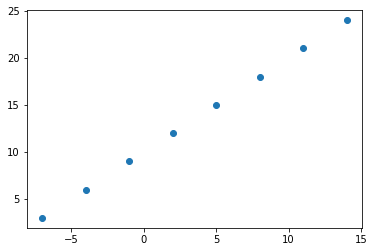

In [3]:
# Lets create some linear data as we are working with regression problem
import numpy as np
import matplotlib.pyplot as plt
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
plt.scatter(X,y)

One of the most import concepts when working with neural network is the input and output shapes

The **Input Shape** is the shape of your data that goes into the model.

The **Output Shape** is the shape of your data that results out of the model

The input and output shape will vary depending on the problem statement


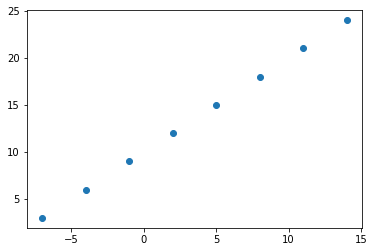

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)

X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
plt.scatter(X,y)

Our goal here will be to use x to predict y.
so our **input** will be x and our **output** will be y
In this case, the model is trained to predict a pattern between x and y
This forms the fundamental concept of input and output for modelling a neural network

**Build a neural network to model it.**

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

**Creating Model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model *(known as transfer learning)*.

**Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

**Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

In [6]:
# lets see these in action using keras Sequential API
# set a random seed
tf.random.set_seed(42)

# create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,#mean absolute error
              optimizer =tf.keras.optimizers.SGD(),
              metrics =['mae']) #stochastic gradient descent
model.fit(X,y,epochs=10)

Epoch 1/10


2022-01-15 18:05:50.326491: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


1/1 [==============================] - 0s 819us/step - loss: 11.5048 - mae: 11.5048
Epoch 2/10
1/1 [==============================] - 0s 839us/step - loss: 11.3723 - mae: 11.3723
Epoch 3/10
1/1 [==============================] - 0s 562us/step - loss: 11.2398 - mae: 11.2398
Epoch 4/10
1/1 [==============================] - 0s 982us/step - loss: 11.1073 - mae: 11.1073
Epoch 5/10
1/1 [==============================] - 0s 634us/step - loss: 10.9748 - mae: 10.9748
Epoch 6/10
1/1 [==============================] - 0s 633us/step - loss: 10.8423 - mae: 10.8423
Epoch 7/10
1/1 [==============================] - 0s 555us/step - loss: 10.7098 - mae: 10.7098
Epoch 8/10
1/1 [==============================] - 0s 813us/step - loss: 10.5773 - mae: 10.5773
Epoch 9/10
1/1 [==============================] - 0s 505us/step - loss: 10.4448 - mae: 10.4448
Epoch 10/10
1/1 [==============================] - 0s 603us/step - loss: 10.3123 - mae: 10.3123


In [7]:
model.predict([17.0])

array([[15.741023]], dtype=float32)

In [8]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

Not a very good result
>`Before TensorFlow 2.0+, Keras was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated within the TensorFlow library.`

### Improving a model

a model can be improved by tweaking values of the model.We can alter almost every step of building a model

**Creating a model** 
 - More layers can be added
 - more number of hidden units can be added
 - activation of each layer can be changed

**Compiling a model**
 - Better optimizer function
 - improve learning rate

**Fitting a model**
 - more number of epochs 
 - more data
 
*There are many different ways to potentially improve a neural network, Because these values are all human-changeable, they're referred to as hyperparameters) and the practice of trying to find the best hyperparameters is referred to as hyperparameter tuning.*

In [9]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.SGD(),metrics=['mae'])
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 635us/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 667us/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 893us/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 616us/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 591us/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 705us/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 700us/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 719us/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [=========================

In [10]:
model.predict([17.0])

array([[30.158512]], dtype=float32)

Thats a better result rather than the previous one. Now we need to see how to evaluate the models

### Evaluate the model

A typical workflow for building a neural network will be as follows:
> Build a model -> evaluate the model -> build(tweak0 a model -> evaluate it -> build (tweak) a model -> evaluate ..... 

The only way to evaluate a model is to visualize everything.
Its a good idea to visualize:
 - **The data** - what data we are working with? what does it look like
 - **The model itself** - What does the architecture look like? What are the different shapes?
 - **The training of a model** - how does a model perform while it learns?
 - **The prediction of model** - how do the predictions of a model line up against the ground truth?
 

In [11]:
# lets have a bigger dataset for visualization
X= np.arange(-100,100,4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [12]:
y = X + 20
y

array([-80, -76, -72, -68, -64, -60, -56, -52, -48, -44, -40, -36, -32,
       -28, -24, -20, -16, -12,  -8,  -4,   0,   4,   8,  12,  16,  20,
        24,  28,  32,  36,  40,  44,  48,  52,  56,  60,  64,  68,  72,
        76,  80,  84,  88,  92,  96, 100, 104, 108, 112, 116])

### Split the data into training/test set

During any machine learning or deep learning project we have to split the data into training, evaluation and test set to give a best model with accurate predictions

Each set has its own purpose in building a good model

- Training set - The model learns from this dataset, which is typically 70-80% of the total dataset
- Validation set - The model gets tuned on this dataset during training,which is typically 10-15% of the total dataset
- Test set - The model gets evaluated on this dataset, to test what it has learned, typically 10-15% of the dataset

> The splitting of the data set is typically done at the start of the project right after the data is processed and before pushing the data through the model

In [13]:
len(X)

50

This is the number of samples we have

In [14]:
# lets split the data into train and test sets
x_train = X[:40]
y_train = y[:40]

x_test = X[40:]
y_test = y[40:]
# lets check the samples in both the datasets
len(x_train),len(x_test)

(40, 10)

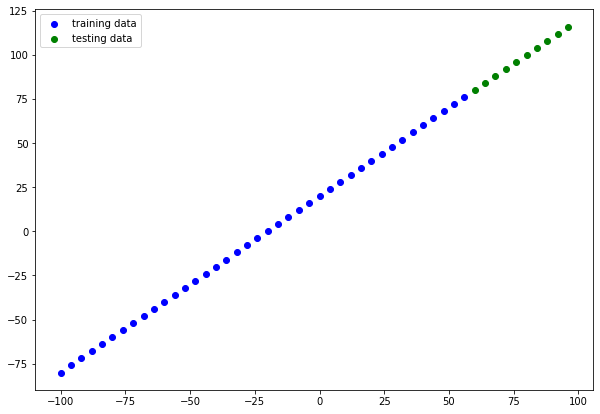

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,c='b',label='training data')
plt.scatter(x_test,y_test,c='g',label='testing data')
plt.legend();

In [16]:
# lets make the same model as before
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape =[1]) # define the input shape for the model
])
model.compile(loss=tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.SGD(),
             metrics =['mae'])

### Visualising the model

Visualizing a model is particularly helpfu when you run into input and output shape mismatches.

`model.summary()` gives a info on the layers and shapes of your model

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Summary() model shows us the layers in the model with the output shape and the number of parameters
- Total params - total number of parameters in the model
- Trainable parameters - These are thee parameters the model can update as it trains.
- Non-trainable parameters - These parameters arent updated during training **(Normally non trainable parameters will come into play during transfer learning)**

In [18]:
# lets make the same model as before
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape =[1]), # define the input shape for the model
#     tf.keras.layers.Dense(2,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.SGD(),
             metrics =['mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(x_train,y_train,epochs=100,verbose=0)
# verbose controls how much gets output

We can also view a 2D plot of the model using `plot_model()`

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes= True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


### Visualizing the prediction

Lets predict the values on the test dataset and lets visualize the dataset.

In [21]:
y_pred = model.predict(x_test)

In [22]:
y_pred

array([[ 67.50719 ],
       [ 71.98253 ],
       [ 76.45787 ],
       [ 80.93321 ],
       [ 85.408554],
       [ 89.883896],
       [ 94.35924 ],
       [ 98.83458 ],
       [103.30991 ],
       [107.78526 ]], dtype=float32)

In [23]:
# now lets visualize the prediction and 
# to do so lets create a function
def plot_predictions(train_data =x_train,
                    train_labels =y_train,
                    test_data = x_test,
                    test_labels= y_test,
                    predictions =y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",label ="training data")
    plt.scatter(test_data,test_labels,c='g',label='testing data')
    plt.scatter(test_data,predictions,c='r',label='predictions')
    plt.legend();

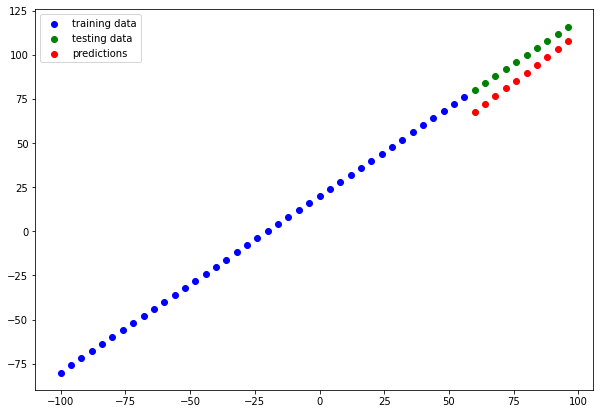

In [24]:
plot_predictions(train_data =x_train,
                    train_labels =y_train,
                    test_data = x_test,
                    test_labels= y_test,
                    predictions =y_pred)

### Evaluating Predictions
evaluation metrics are the best alternative option for evaluation of your model

*Depending on the problem,different models have different evaluation metrics*

Two of the main metrics used for regression problems are:

- **Mean absolute error(MAE)** - the mean difference between each of the predictions.

- **Mean squared error(MSE)** - the squared mean difference between each of the predictions

The lower values for the above, the better.
`model.evaluate()` can be used to check the loss of the model as well as any metrics setup during the compile step


In [25]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 792us/step - loss: 10.3538 - mae: 10.3538


[10.353775978088379, 10.353775978088379]

In our case, since we used MAE for the loss function as well as MAE for the metrics, model.evaulate() returns them both.

Tensorflow has both built in function MSE and MAE

In [26]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true =y_test,y_pred = y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([30.492813, 26.017471, 21.54213 , 17.25343 , 13.954867, 11.646441,
       10.328153, 10.      , 10.661983, 12.314105], dtype=float32)>

Instead of recieving one single output we have recieved 10. This is due to the shape of the output and input


In [27]:
y_test.shape,y_pred.shape

((10,), (10, 1))

As we can see the shape varies. This can be fixed using 
`squeeze()`. it will remove the first dimension from the output and hence both will be of the same shape.

>  When comparing 2 Tensors, make sure they are of the same shape to prevent any errors

In [28]:
y_pred.shape,y_pred.squeeze().shape

((10, 1), (10,))

In [29]:
mae = tf.metrics.mean_absolute_error(y_true =y_test,y_pred = y_pred.squeeze())
mse = tf.metrics.mean_squared_error(y_test,y_pred.squeeze())

In [30]:
mae,mse

(<tf.Tensor: shape=(), dtype=float32, numpy=10.353776>,
 <tf.Tensor: shape=(), dtype=float32, numpy=109.06476>)

In [31]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

This can be further improved in different ways, but 3 of the main ones are:
 - **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
 - **Make your model larger** (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
 - **Train for longer** - give your model more of a chance to find the patterns in the data.

To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.
model_2 - 2 layers, trained for 100 epochs.
model_3 - 2 layers, trained for 500 epochs.

In [32]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(x_train, y_train, epochs=100, verbose =0)

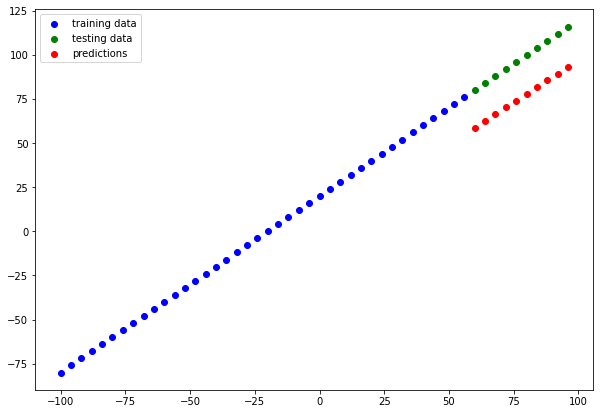

In [33]:
# plotting prediction for model_1
y_pred_1 = model_1.predict(x_test)
plot_predictions(predictions=y_pred_1)

In [34]:
# lets make the same model as before
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape =[1]), # define the input shape for the model
#     tf.keras.layers.Dense(2,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu'),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.SGD(),
             metrics =['mae'])
model_2.fit(x_train,y_train,epochs =100,verbose=0)

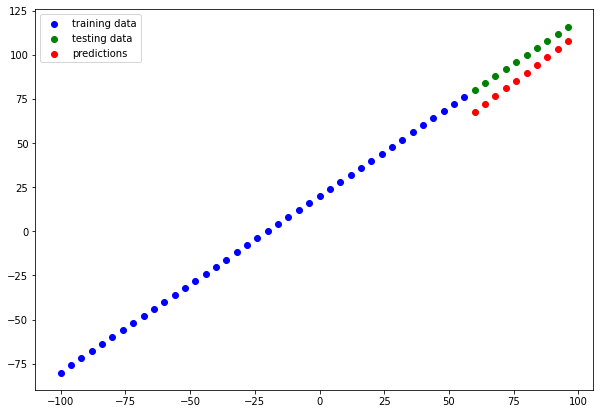

In [35]:
y_pred_2 = model_2.predict(x_test)
plot_predictions(predictions=y_pred_2)

In [101]:
# lets make the same model as before
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.SGD(),
             metrics =['mae'])
model_3.fit(x_train,y_train,epochs =100,verbose=0)

In [102]:
y_pred_3 = model_3.predict(x_test)
plot_predictions(predictions=y_pred_3)

In [103]:
#calculating Model_3 metrics
mae_3 =mae(y_test,y_pred_3.squeeze()).numpy()
mse_3 = mse(y_test,y_pred_3.squeeze()).numpy()
mae_3,mse_3

In [104]:
# lets make the same model as before
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.SGD(),
             metrics =['mae'])
model_3.fit(x_train,y_train,epochs =150,verbose=0)

In [105]:
y_pred_3 = model_3.predict(x_test)
plot_predictions(predictions=y_pred_3)

In [106]:
#calculating Model_3 metrics
mae_3 =mae(y_test,y_pred_3.squeeze()).numpy()
mse_3 = mse(y_test,y_pred_3.squeeze()).numpy()
mae_3,mse_3

We can see that the above model has the best prediction.

### Saving a model

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

- The SavedModel format (default).
- The HDF5 format.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [107]:
model_3.save('best_model')

In [108]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model

In [109]:
model_3.save("best_model_HDF5.h5")

In [110]:
# Check it out
!ls best_model_HDF5.h5

In [111]:
load_model = tf.keras.models.load_model('best_model')
load_model.summary()

In [112]:
# model_2_preds = model_3.predict(X_test)
# saved_model_preds = load_model.predict(X_test)
mae(y_test, load_model.predict(x_test).squeeze()).numpy() == mae(y_test, model_3.predict(x_test).squeeze()).numpy()

In [113]:
load_h5_model = tf.keras.models.load_model("best_model_HDF5.h5")
load_h5_model.summary()

In [114]:
mae(y_test, load_h5_model.predict(x_test).squeeze()).numpy() == mae(y_test, model_3.predict(x_test).squeeze()).numpy()

Lets predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.


In [115]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [117]:
insurance.head()

In [118]:
insurance.info()

In [119]:
insurance.isnull().any()

In [120]:
insurance.describe()

We need to process the data before we move to training a model. 
Here we can use `get_dummies()` method in pandas.

it converts categorical variables into numerical variables using one-hot encoding.

In [121]:
processed_data = pd.get_dummies(insurance)
processed_data.head()


In [122]:
processed_data.info()

In [123]:
# let us have a look at the correlation 
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.heatmap(processed_data.corr(),cmap="Blues",annot=True)

In [124]:
# lets create a the train and test sets
x = processed_data.drop("charges",axis=1)
y = processed_data['charges']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [143]:
tf.random.set_seed(42)
Insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

#compile the model
Insurance_model.compile(loss =tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics =['mae'])
history =Insurance_model.fit(x_train,y_train,epochs = 500,verbose =0)

In [144]:
#lets evaluate the model
Insurance_model.evaluate(x_test,y_test)

In [148]:
pd.DataFrame(history.history).plot()

From this, it looks like our model's loss (and MAE) were both still decreasing and reduced decreasing after 400 epochs (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

How long a model has to be trained depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an EarlyStopping callback so it stops automatically when it stops improving.



### Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
- Turning all of your data to numbers (a neural network can't handle strings).
- Making sure your data is in the right shape (verifying input and output shapes).
- Feature scaling:
    - Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
    - Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.
    
*Which one should you use?*

*With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.*


 we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:
- make_column_transformer - build a multi-step data preprocessing function for the folllowing trnasformations:
- MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).
- OneHotEncoder - one hot encode the non-numerical columns.

In [149]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# create column transformer( Helps normalize/preprocess the data)
ct = make_column_transformer((MinMaxScaler(),["age","bmi","children"]), # all values between 0 and 1
                            (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]))
X = insurance.drop("charges",axis =1)
y = insurance["charges"]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state =42)
ct.fit(x_train)
x_train_normal =ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [152]:
x_train.loc[0]


In [153]:
x_train_normal[0]

In [154]:
x_train_normal.shape,x_train.shape

In [155]:
tf.random.set_seed(42)
Insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

#compile the model
Insurance_model.compile(loss =tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics =['mae'])
history =Insurance_model.fit(x_train_normal,y_train,epochs = 500,verbose =0)

In [159]:
insurance_model_3_loss, insurance_model_3_mae = Insurance_model.evaluate(x_test_normal, y_test)

In [160]:
pd.DataFrame(history.history).plot()